# Sentiment Analysis

YouTube Tutorial: [Python Sentiment Analysis](https://www.youtube.com/watch?v=QpzMWQvxXWk)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

plt.style.use('ggplot')

In [2]:
# Read data from csv file 
dfReviewsV0 = pd.read_csv('../Sentiment_Analysis/Reviews.csv')

In [3]:
dfReviewsV0.sample(8)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
411666,411667,B001D6KH8K,A2NJRS0VGMV9NI,R. Baker,2,4,5,1255564800,Gourmet Egg Nog is Great!,This concentrated Egg Nog Extract is difficult...
96135,96136,B004HOLD4W,A2L4CXG23Z4U3U,BoWiiVille,0,0,5,1333497600,Best flavor and best price of any Blue Diamond...,The flavor of these is just amazing. They are ...
108501,108502,B0030VBQGS,A2XWFSMXJ1RR0R,Mel M.,1,1,5,1304467200,Best price for organic pouched pears,If you need the convenience of this kind of po...
359042,359043,B003CIBPN8,A3B9QZNGAOZSXH,S. B. Simkins,1,1,1,1315267200,DISGUSTING!,This is so gross. Zico should be ashamed!<br ...
38517,38518,B004S036D6,A1N655X9X7C6QY,"C. Cook ""LIVE..........LOVE........AND..........",6,7,4,1322524800,I LOVE the stuff,What can I really say about this 25-ounce Horm...
300132,300133,B0029JIBQK,A1HA8XN2ES69C,"A. Crain ""texas shopper""",2,2,5,1318464000,Not as advertised,The product description said 6 packages of Dar...
424678,424679,B00494HZ42,A15G7OC6BI9Y64,"Winfield S. Danielson ""Win""",0,0,4,1305936000,Our Choice,"Of the reasonably priced dry cat foods, Nutro ..."
423815,423816,B0036ZLUI2,A3A079RFXJCCCJ,"Adriene N. Henderson ""adriene""",0,0,4,1338854400,No Complaints,I'm making perfect Vietnamese style coffee wit...


In [4]:
print(dfReviewsV0.shape)

(568454, 10)


## Downsize the Dataset

This allows to use a smaller datatset that requires less resources to process, since this is a tutorial. 

In [10]:
dfReviewsV1 = dfReviewsV0.sample(10000,random_state=1)

In [11]:
dfReviewsV1.shape

(10000, 10)

In [12]:
dfReviewsV1.sample(8)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
278019,278020,B000WFKI82,A3F2P8DZBM72HY,slna111,2,2,5,1346198400,She loves it,"Since starting Wellness wet food, not only doe..."
168175,168176,B005VOOKS8,A2UQGGK8VJPUH5,I. Zawilski,0,1,5,1332892800,"Pricey, But Delicious","These are pods, designed to be used in a singl..."
164268,164269,B000G7VYRA,A2IUXZ60NRW8ZO,Debi71294,0,0,5,1346198400,Hanover HMO Pcs,I am huge pretzel lover.<br />These in my opin...
37633,37634,B002R81L92,A5NNM0PDNW67S,E. Grannis,3,3,5,1309824000,"these are awesome chocolates, however",my 2 bags of dark chocolate covered pomegranat...
14630,14631,B0032BXUJM,A3J34RA5HFB348,"jrm staten island, ny",0,0,5,1341964800,superb coffee,I made purchased this coffee a number of times...
515674,515675,B000EG6G9E,A107L4C20IDLLD,N. Moura,0,0,4,1313280000,Good stuff,"Highly addictive, takes me back to my childhoo..."
410138,410139,B002NWIQQI,A2MMW09EF2DD8T,LindaLouise6517,0,0,5,1319846400,Excellent Product,These are very good dates - quite moist and me...
87065,87066,B001PMDYZA,AZ65W8C4CPKST,Sally,1,1,5,1240444800,great healthy dog food,Great organic dog food from a company I trust....


In [32]:
# Export sample datatset to a local csv
dfReviewsV1.to_csv('../Sentiment_Analysis/Reviews_10K_Sample.csv',index=False)

## EDA 

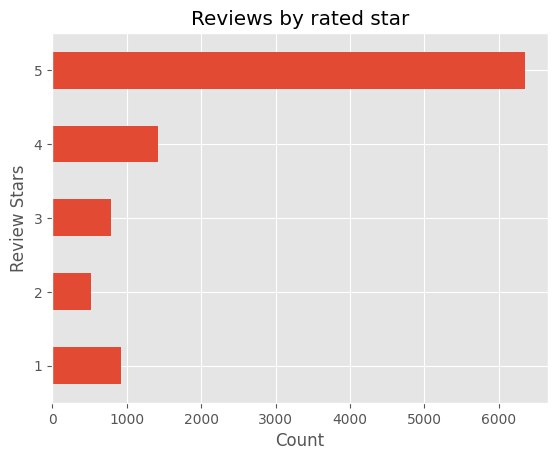

In [13]:
# Plot the frequencies of star ratings
# Line continuation is '\', no space allowed after the backslash
ax = dfReviewsV1['Score'].value_counts().sort_index() \
                    .plot(kind='barh',
                          title='Reviews by rated star')
ax.set_ylabel('Review Stars')
ax.set_xlabel('Count')

plt.show()

### Considerations 

The most reviews is '5' and then shrinks heavily from '4' to '2', but increases a bit on the '1 star'. This is a heavy bias to the right.

## Basic NLTK Analysis

Pick out a quick example and test some NLTK basic functions.

[NLTK: What is NLTK (EDUCBA)](https://www.educba.com/nltk/)
Scroll down to bottom of page for tutorials.

In [15]:
strExample = dfReviewsV1['Text'][515674]

print(strExample)

Highly addictive, takes me back to my childhood when candy stores use to sell chocolate covered honeycomb.  Be sure you get the expedited shipping, and the regular route arrived with the cold packs melted and warm.


In [16]:
# Splits the sentece in words
lstTokens = nltk.word_tokenize(strExample)

lstTokens

['Highly',
 'addictive',
 ',',
 'takes',
 'me',
 'back',
 'to',
 'my',
 'childhood',
 'when',
 'candy',
 'stores',
 'use',
 'to',
 'sell',
 'chocolate',
 'covered',
 'honeycomb',
 '.',
 'Be',
 'sure',
 'you',
 'get',
 'the',
 'expedited',
 'shipping',
 ',',
 'and',
 'the',
 'regular',
 'route',
 'arrived',
 'with',
 'the',
 'cold',
 'packs',
 'melted',
 'and',
 'warm',
 '.']

### NLTK POS Tag Function

This function delivers a type of classification in a form of as 'descriptor'. The *descriptor* is a ‘tag,’ representing one of the components of speech and semantic information. When it comes to Part-of-Speech (POS) tagging, on the other hand, it can be defined as the process of turning a sentence written as a list of words into a list of tuples. The tuples, in this case, have the word tag form. POS tagging can alternatively be defined as the process of associating a given the word with a part of speech.

In [18]:
# Parts of speech analysis
# Requires to import the tagger dictionary
nltk.download('averaged_perceptron_tagger')

lstPOStagged = nltk.pos_tag(lstTokens)

lstPOStagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ulrichca\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Highly', 'NNP'),
 ('addictive', 'JJ'),
 (',', ','),
 ('takes', 'VBZ'),
 ('me', 'PRP'),
 ('back', 'RB'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('childhood', 'NN'),
 ('when', 'WRB'),
 ('candy', 'NN'),
 ('stores', 'NNS'),
 ('use', 'VBP'),
 ('to', 'TO'),
 ('sell', 'VB'),
 ('chocolate', 'NN'),
 ('covered', 'VBN'),
 ('honeycomb', 'NN'),
 ('.', '.'),
 ('Be', 'VB'),
 ('sure', 'JJ'),
 ('you', 'PRP'),
 ('get', 'VBP'),
 ('the', 'DT'),
 ('expedited', 'JJ'),
 ('shipping', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('regular', 'JJ'),
 ('route', 'NN'),
 ('arrived', 'VBD'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('cold', 'JJ'),
 ('packs', 'NNS'),
 ('melted', 'VBN'),
 ('and', 'CC'),
 ('warm', 'JJ'),
 ('.', '.')]

The meaning of the tags can be found here: [NLTK POS Tag List](https://www.educba.com/nltk-pos-tag/)

### NLTK Chunk Entity Tokens

This function chunks the given list of tagged tokens.

In [24]:
# Download the chunk entity and words dictionary
nltk.download('maxent_ne_chunker')
nltk.download('words')

lstChunkEntity = nltk.chunk.ne_chunk(lstPOStagged)

# Print the list in a nice form.
lstChunkEntity.pprint()

(S
  (GPE Highly/NNP)
  addictive/JJ
  ,/,
  takes/VBZ
  me/PRP
  back/RB
  to/TO
  my/PRP$
  childhood/NN
  when/WRB
  candy/NN
  stores/NNS
  use/VBP
  to/TO
  sell/VB
  chocolate/NN
  covered/VBN
  honeycomb/NN
  ./.
  Be/VB
  sure/JJ
  you/PRP
  get/VBP
  the/DT
  expedited/JJ
  shipping/NN
  ,/,
  and/CC
  the/DT
  regular/JJ
  route/NN
  arrived/VBD
  with/IN
  the/DT
  cold/JJ
  packs/NNS
  melted/VBN
  and/CC
  warm/JJ
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ulrichca\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ulrichca\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Sentiment Analysis

### VADER Sentiment Analysis

Will use NLTK's `SentimentIntensityAnalyzer` to get the negative, neutral, positive scores of a given text from VADER package. VADER stands for *Valence Aware Dictionary and sEntiment Reasoner*. This package uses the *bag of words* approach, 
1. Stop words are removed
2. Each word is scored and combined to a total score

This approach doesn't account for words relationship which in some contexts can affect the sentiment analysis, since the relaship between words is an important indicator of a sentiment in human speech. 

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# VADER lexicon dictionary is required
nltk.download('vader_lexicon')

siaMySentimentAnalyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ulrichca\AppData\Roaming\nltk_data...


In [28]:
# Sentiment analysis text on a given positve sentence
siaMySentimentAnalyzer.polarity_scores('This library looks promising!')

{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.4574}

In [29]:
# Sentiment analysis text on a given negative sentence
siaMySentimentAnalyzer.polarity_scores('This sentiment dictinary is awful!')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.5093}

In [30]:
# Sentiment analysis text on a feedback comment
siaMySentimentAnalyzer.polarity_scores('This library looks promising!')

{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.4574}

### Roberta Sentiment Analysis

The implementation code is continued as a Kaggle notebook here: 

[sentiment-analysis-python-FJU](https://www.kaggle.com/franzjulrich/sentiment-analysis-python-fju/edit)